## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [2]:
im = cv2.imread('elephant.jpg') # read an image in BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB) #brief Converts an image from one color space to another.
original_image=im.shape
print(im.shape)

(330, 500, 3)


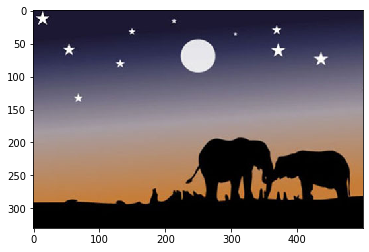

In [3]:
plt.imshow(im)
plt.show()

In [4]:
# flatten each channel of the image in linear array 

all_pixels = im.reshape((330*500, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(165000, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=100)  #change the value of k for clustering
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[137 130 144]
 [ 27  24  50]
 [185 136  96]
 [  0   0   0]
 [ 98  95 118]
 [233 232 236]
 [ 69  69 100]
 [170 152 147]
 [195 127  66]
 [ 44  44  79]
 [ 84  81 110]
 [109  75  49]
 [179 143 117]
 [154 145 156]
 [120 114 135]
 [ 34  33  65]
 [151 110  76]
 [ 56  28   7]
 [165 155 162]
 [175 147 131]
 [ 59  59  94]
 [194 125  56]
 [105 101 124]
 [195 195 207]
 [252 252 252]
 [190 133  84]
 [145 137 150]
 [ 83  63  50]
 [133 126 141]
 [ 91  89 113]
 [ 40  40  74]
 [  2   2   7]
 [173 150 140]
 [ 51  51  87]
 [ 77  75  96]
 [110 107 128]
 [ 27  16  11]
 [157 104  55]
 [ 32  30  61]
 [166 155 158]
 [ 98  83  73]
 [191 131  77]
 [206 125  52]
 [ 63  64  96]
 [187 135  90]
 [183 140 107]
 [ 85  54  30]
 [176 146 127]
 [129 122 139]
 [170 115  64]
 [178 144 123]
 [211 210 222]
 [140  94  54]
 [125 118 137]
 [  8   1   1]
 [179 178 192]
 [132 110  97]
 [141 134 147]
 [ 61  36  19]
 [ 78  77 107]
 [  1   1   1]
 [205 131  63]
 [ 20  17  40]
 [150 141 154]
 [ 95  93 116]
 [115 111 132]
 [126  81 

# Plot What all colors are these? 

In [8]:
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,100,i) #change number of colors
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

# Segmenting Our Original Image

In [9]:
new_img = np.zeros((330*500, 3), dtype='uint8')

print(new_img.shape)

(165000, 3)


In [10]:
colors

[array([137, 130, 144], dtype=uint8),
 array([27, 24, 50], dtype=uint8),
 array([185, 136,  96], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([ 98,  95, 118], dtype=uint8),
 array([233, 232, 236], dtype=uint8),
 array([ 69,  69, 100], dtype=uint8),
 array([170, 152, 147], dtype=uint8),
 array([195, 127,  66], dtype=uint8),
 array([44, 44, 79], dtype=uint8),
 array([ 84,  81, 110], dtype=uint8),
 array([109,  75,  49], dtype=uint8),
 array([179, 143, 117], dtype=uint8),
 array([154, 145, 156], dtype=uint8),
 array([120, 114, 135], dtype=uint8),
 array([34, 33, 65], dtype=uint8),
 array([151, 110,  76], dtype=uint8),
 array([56, 28,  7], dtype=uint8),
 array([165, 155, 162], dtype=uint8),
 array([175, 147, 131], dtype=uint8),
 array([59, 59, 94], dtype=uint8),
 array([194, 125,  56], dtype=uint8),
 array([105, 101, 124], dtype=uint8),
 array([195, 195, 207], dtype=uint8),
 array([252, 252, 252], dtype=uint8),
 array([190, 133,  84], dtype=uint8),
 array([145, 137, 150], dtype=uin

In [11]:
km.labels_

array([62,  1,  1, ...,  3,  3,  3], dtype=int32)

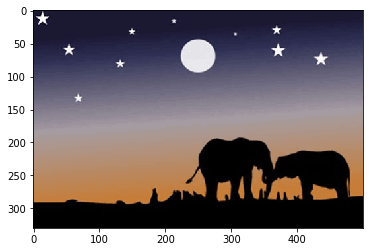

In [12]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
# print(original_image)    
    
new_img = new_img.reshape((original_image))
# print(new_img.shape)
plt.imshow(new_img)
plt.show()